In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [18]:
data = pd.read_csv("dataset_mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7921 non-null   object
 1   cap-shape                 7921 non-null   object
 2   cap-surface               7921 non-null   object
 3   cap-color                 7921 non-null   object
 4   bruises                   7921 non-null   object
 5   odor                      7921 non-null   object
 6   gill-attachment           7921 non-null   object
 7   gill-spacing              7921 non-null   object
 8   gill-size                 7921 non-null   object
 9   gill-color                7921 non-null   object
 10  stalk-shape               7921 non-null   object
 11  stalk-root                7921 non-null   object
 12  stalk-surface-above-ring  7921 non-null   object
 13  stalk-surface-below-ring  7921 non-null   object
 14  stalk-color-above-ring  

In [20]:
data.isnull().any() # check if there is any missing data

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [21]:
# check for possible '?' in data
test_data = data.replace("?", np.NaN)
test_data.isnull().any()

# False -> no '?' found

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                   True
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

## Replace data using column description

In [22]:
data_definitions = pd.read_csv("columns_definitions.csv")
data_definitions

,column_name,defs
0,class,"{""e"": ""edible"", ""p"": ""poisonous""}"
1,cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
2,cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
3,cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
4,bruises,"{""t"": ""bruises"", ""f"": ""no""}"
5,odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
6,gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
7,gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
8,gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"
9,gill-color,"{""k"": ""black"", ""n"": ""brown"", ""b"": ""buff"", ""h"":..."


In [23]:
data_definitions.set_index('column_name')

,defs
column_name,
class,"{""e"": ""edible"", ""p"": ""poisonous""}"
cap-shape,"{""b"": ""bell"", ""c"": ""conical"", ""x"": ""convex"", ""..."
cap-surface,"{""f"": ""fibrous"", ""g"": ""grooves"", ""y"": ""scaly"",..."
cap-color,"{""n"": ""brown"", ""b"": ""buff"", ""c"": ""cinnamon"", ""..."
bruises,"{""t"": ""bruises"", ""f"": ""no""}"
odor,"{""a"": ""almond"", ""l"": ""anise"", ""c"": ""creosote"",..."
gill-attachment,"{""a"": ""attached"", ""d"": ""descending"", ""f"": ""fre..."
gill-spacing,"{""c"": ""close"", ""w"": ""crowded"", ""d"": ""distant""}"
gill-size,"{""b"": ""broad"", ""n"": ""narrow""}"


In [24]:
columns_dictionaries_list = []

for column_name in data_definitions.index:
    s = data_definitions.loc[column_name]['defs']
    columns_dictionaries_list.append(eval(s))

columns_dictionaries_list[:5]

[{'e': 'edible', 'p': 'poisonous'},
 {'b': 'bell',
  'c': 'conical',
  'x': 'convex',
  'f': 'flat',
  'k': 'knobbed',
  's': 'sunken'},
 {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
 {'n': 'brown',
  'b': 'buff',
  'c': 'cinnamon',
  'g': 'gray',
  'r': 'green',
  'p': 'pink',
  'u': 'purple',
  'e': 'red',
  'w': 'white',
  'y': 'yellow'},
 {'t': 'bruises', 'f': 'no'}]

In [25]:
features_data = list(data.columns)
print(features_data)
print("# of features: ",len(features_data))

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
# of features:  23


In [26]:
features_data_definitions = list(data_definitions['column_name'])
print(features_data_definitions)
print("# of features: ",len(features_data_definitions))

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
# of features:  23


In [27]:
set(features_data).symmetric_difference(set(features_data_definitions))

# returned an empty set, meaning the column names are identical in both dataset and column definition file

set()

In [28]:
data_copy = data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [29]:
data_copy['class'].replace(columns_dictionaries_list[0],inplace=True)

In [30]:
data_copy.head() # check if raplacement was successful

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now iterate through each column

In [31]:
data_new = data # raw dataframe each time the cell is running
i = 0
for column_name in features_data:
    data_new[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1

In [32]:
data_new.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1038,poisonous,flat,scaly,white,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,brown,several,grasses
941,edible,convex,smooth,brown,no,none,free,crowded,broad,black,...,fibrous,white,white,partial,white,one,evanescent,black,scattered,grasses
3317,edible,flat,fibrous,brown,bruises,none,free,close,broad,purple,...,smooth,gray,gray,partial,white,one,pendant,brown,solitary,woods
4427,poisonous,flat,fibrous,gray,no,foul,free,close,broad,chocolate,...,silky,buff,buff,partial,white,one,large,chocolate,solitary,grasses
7809,edible,bell,smooth,brown,no,none,attached,close,broad,orange,...,smooth,orange,orange,partial,brown,one,pendant,brown,several,leaves


## Clean data in submission dataset

In [34]:
data_submission = pd.read_csv("submission_mushrooms.csv")
data_submission.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,y,y,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,v,d
1,1,b,s,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,2,x,f,n,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
3,3,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
4,4,f,s,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d


In [35]:
data_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                203 non-null    int64 
 1   cap-shape                 203 non-null    object
 2   cap-surface               203 non-null    object
 3   cap-color                 203 non-null    object
 4   bruises                   203 non-null    object
 5   odor                      203 non-null    object
 6   gill-attachment           203 non-null    object
 7   gill-spacing              203 non-null    object
 8   gill-size                 203 non-null    object
 9   gill-color                203 non-null    object
 10  stalk-shape               203 non-null    object
 11  stalk-root                203 non-null    object
 12  stalk-surface-above-ring  203 non-null    object
 13  stalk-surface-below-ring  203 non-null    object
 14  stalk-color-above-ring    

In [36]:
data_submission.drop(['Unnamed: 0'],axis=1,inplace=True)
data_submission.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,y,y,f,f,f,c,b,h,e,...,k,n,b,p,w,o,l,h,v,d
1,b,s,y,t,l,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,x,f,n,t,n,f,c,b,u,t,...,s,p,w,p,w,o,p,n,y,d
3,k,s,n,f,y,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,p
4,f,s,e,f,f,f,c,n,b,t,...,k,w,p,p,w,o,e,w,v,d


In [37]:
data_submission.notnull().any()

cap-shape                   True
cap-surface                 True
cap-color                   True
bruises                     True
odor                        True
gill-attachment             True
gill-spacing                True
gill-size                   True
gill-color                  True
stalk-shape                 True
stalk-root                  True
stalk-surface-above-ring    True
stalk-surface-below-ring    True
stalk-color-above-ring      True
stalk-color-below-ring      True
veil-type                   True
veil-color                  True
ring-number                 True
ring-type                   True
spore-print-color           True
population                  True
habitat                     True
dtype: bool

In [38]:
test = data_submission.replace("?", np.NaN) # there are some '?' in the set
test[:10]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,y,y,f,f,f,c,b,h,e,...,k,n,b,p,w,o,l,h,v,d
1,b,s,y,t,l,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,x,f,n,t,n,f,c,b,u,t,...,s,p,w,p,w,o,p,n,y,d
3,k,s,n,f,y,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,p
4,f,s,e,f,f,f,c,n,b,t,...,k,w,p,p,w,o,e,w,v,d
5,f,y,e,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,y,d
6,f,s,g,f,n,f,w,b,n,t,...,f,w,w,p,w,o,e,n,a,g
7,f,y,n,t,l,f,c,b,n,e,...,y,w,w,p,w,o,p,n,s,g
8,x,s,w,f,n,f,w,b,p,t,...,s,w,w,p,w,o,e,n,a,g
9,x,s,n,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,s,g


In [39]:
test.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                   True
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [40]:
test['stalk-root'].value_counts(dropna=False) 
# show how many NaN there are. 1/3 of the column is empty

# in the column definitions it is know that there are missing values
# so first we can change the data definition

b      89
NaN    61
e      28
c      21
r       4
Name: stalk-root, dtype: int64

In [41]:
test_data['stalk-root'].value_counts(dropna=False) 

# missing data from original dataset

b      3687
NaN    2419
e      1092
c       535
r       188
Name: stalk-root, dtype: int64

In [42]:
datadef_new = data_submission # raw dataframe each time the cell is running

i = 1
for column_name in features_data[1:]: # [1:] -> we don't need 'class' column
    datadef_new[column_name].replace(columns_dictionaries_list[i], inplace=True)
    i+=1


In [43]:
datadef_new.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,scaly,yellow,no,foul,free,close,broad,chocolate,enlarging,...,silky,brown,buff,partial,white,one,large,chocolate,several,woods
1,bell,smooth,yellow,bruises,anise,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,convex,fibrous,brown,bruises,none,free,close,broad,purple,tapering,...,smooth,pink,white,partial,white,one,pendant,brown,solitary,woods
3,knobbed,smooth,brown,no,fishy,free,close,narrow,buff,tapering,...,smooth,white,pink,partial,white,one,evanescent,white,several,paths
4,flat,smooth,red,no,foul,free,close,narrow,buff,tapering,...,silky,white,pink,partial,white,one,evanescent,white,several,woods


In [44]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [45]:
data_copy = data.drop(columns=['class','stalk-root'],axis=1)
data_copy = pd.get_dummies(data_copy)

In [46]:
from sklearn.preprocessing import label_binarize
Y=label_binarize(data['class'], classes=['edible','poisonous'])
data_copy['class']=Y
data_copy.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [47]:
X=np.array(data_copy.drop(columns=['class'],axis=1))
X

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [48]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, roc_curve

model=LR()
x_train, x_test, y_train, y_test = tts(X, data_copy['class'])
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_LR = accuracy_score(y_test, y_scores.round())
FPR_LR, TPR_LR, _ = roc_curve(y_test, y_scores)

accuracy_LR


0.9989904088844018

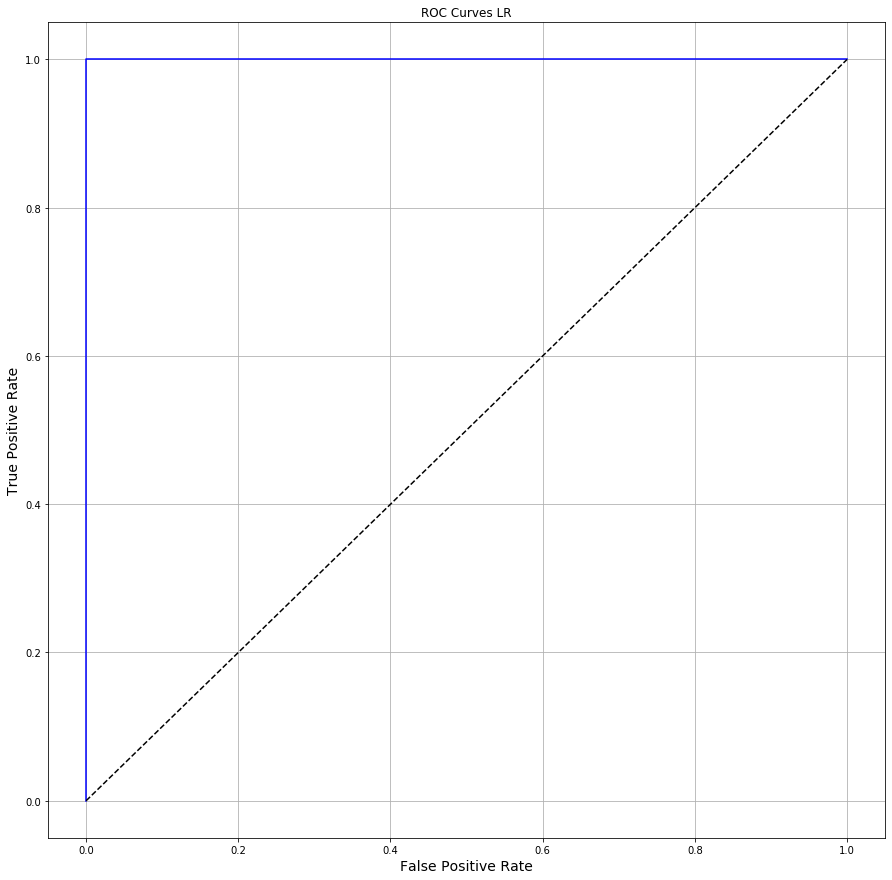

In [49]:
plt.plot(FPR_LR, TPR_LR, c="blue")
plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC Curves LR")
plt.gcf().set_size_inches(15,15)
#wow

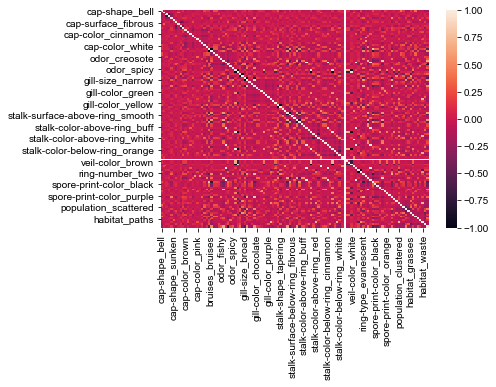

In [50]:
import seaborn as sns

sns.heatmap(data_copy.corr())
sns.set(rc={'figure.figsize':(30,30)})

In [51]:
data_corr = data_copy.corr(method="pearson")
data_corr.to_excel("output.xlsx")

In [52]:
data_copy.drop(columns=['veil-type_partial'],axis=1,inplace=True)
# remove useless feature "veil-type_partial" from the main dataset

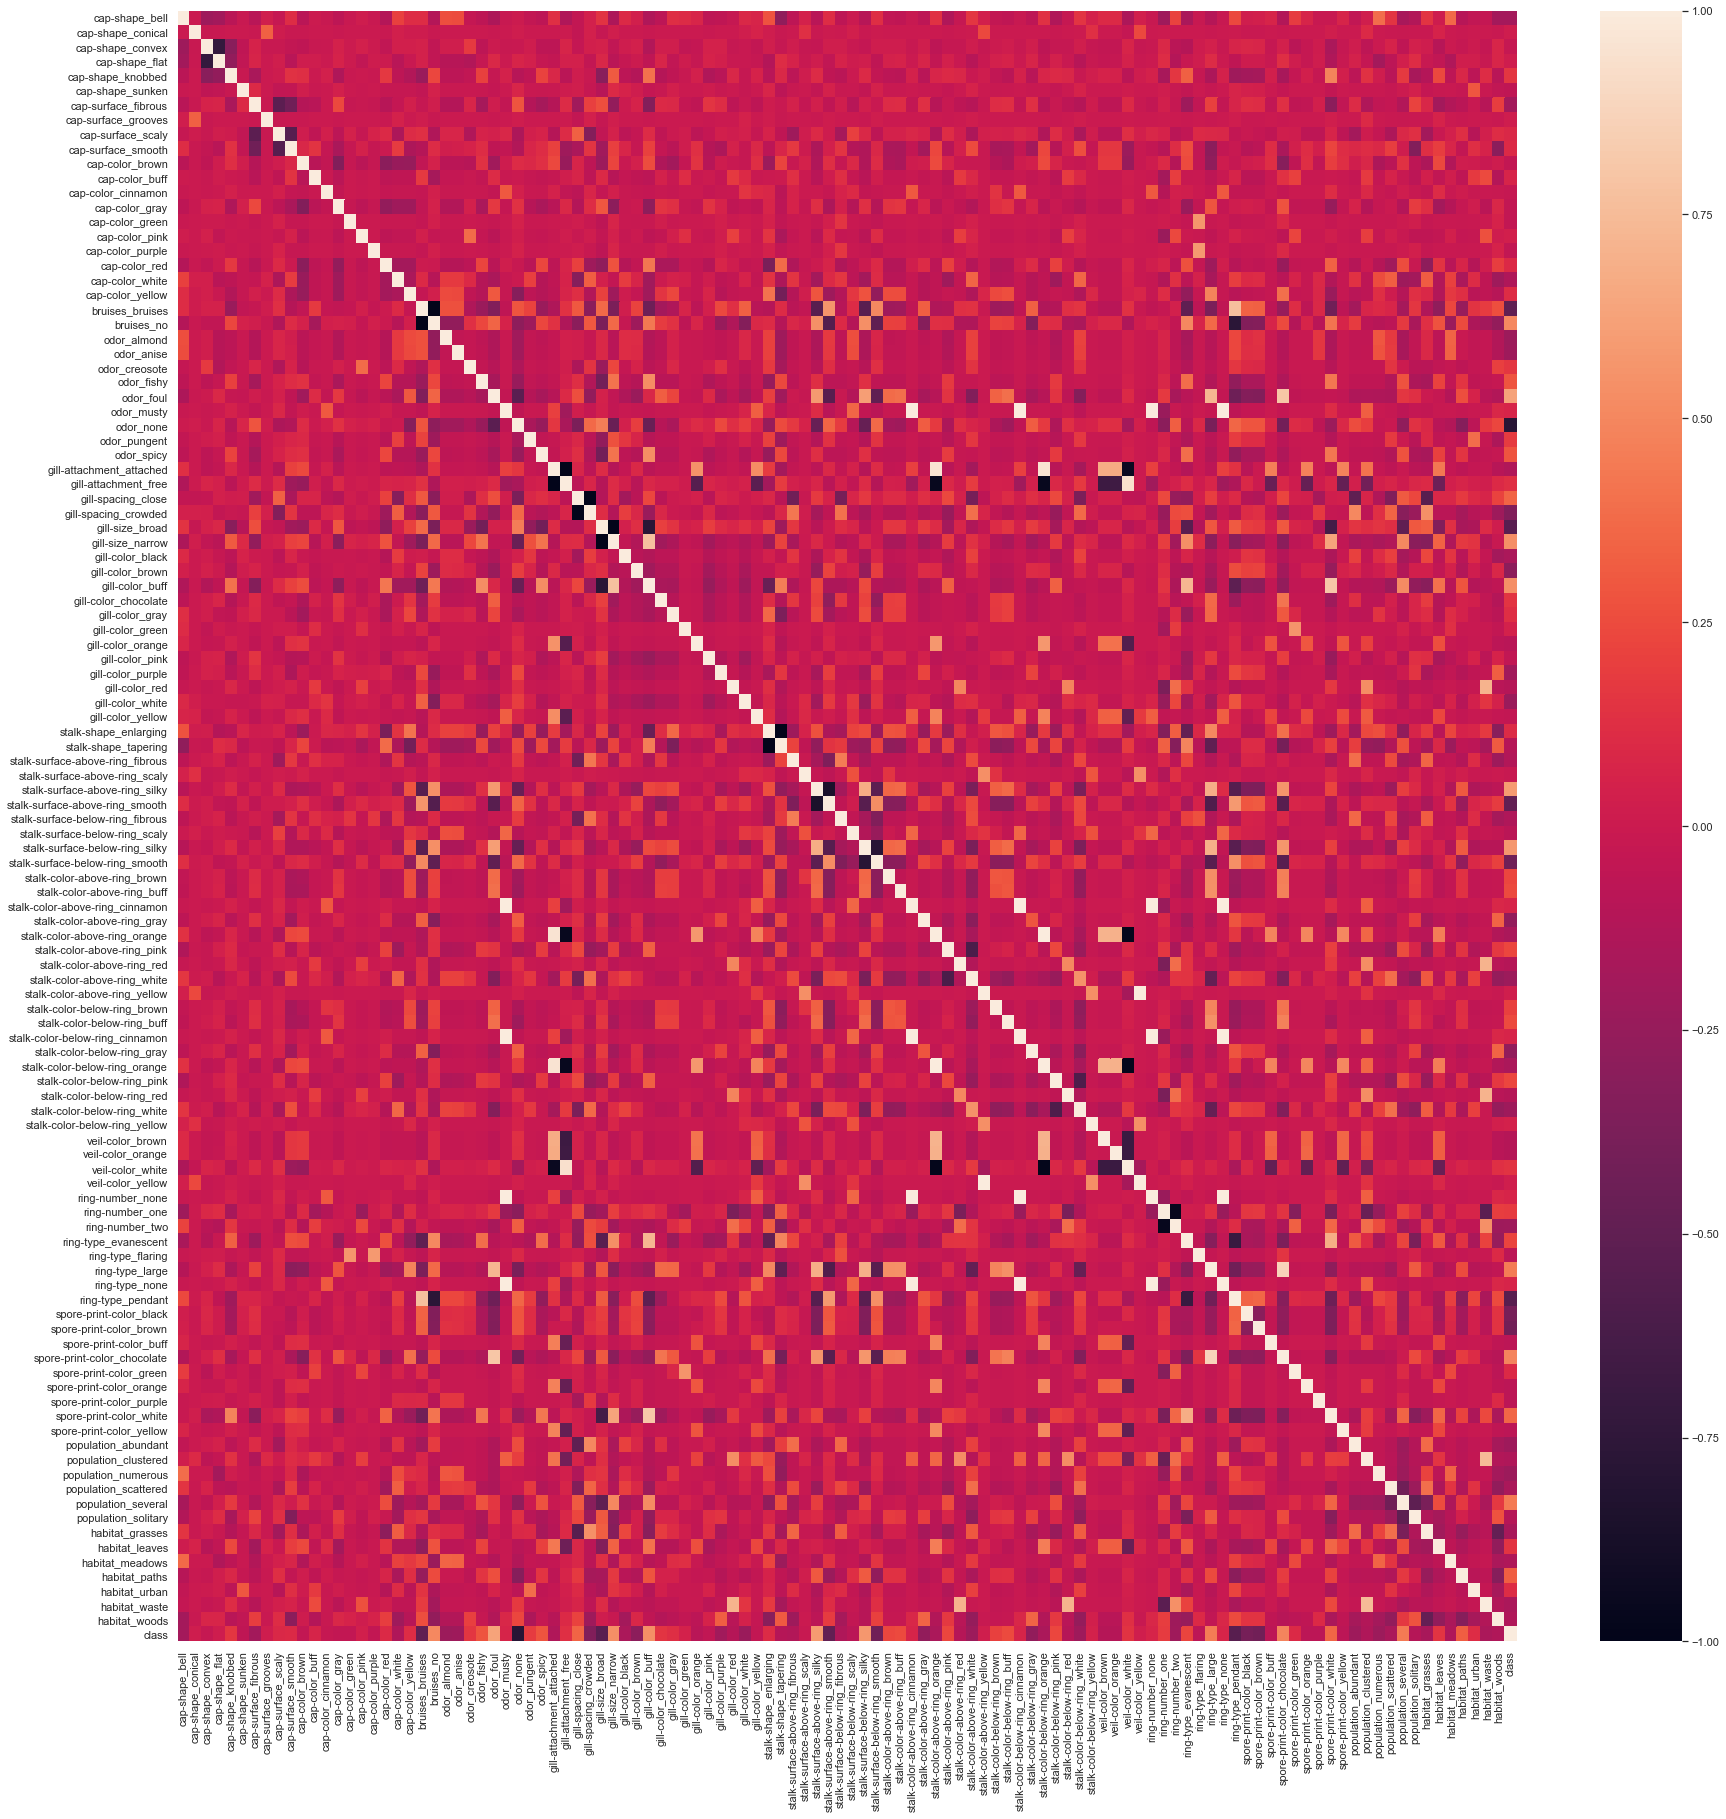

In [53]:
sns.heatmap(data_copy.corr())
sns.set(rc={'figure.figsize':(30,30)})

In [54]:
data_submission.drop(columns=['veil-type'],axis=1,inplace=True)
# remove useless feature "veil-type_partial" from the test dataset

In [55]:
data_submission.drop(columns=['stalk-root'],axis=1,inplace=True)

In [56]:
data_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 203 non-null    object
 1   cap-surface               203 non-null    object
 2   cap-color                 203 non-null    object
 3   bruises                   203 non-null    object
 4   odor                      203 non-null    object
 5   gill-attachment           203 non-null    object
 6   gill-spacing              203 non-null    object
 7   gill-size                 203 non-null    object
 8   gill-color                203 non-null    object
 9   stalk-shape               203 non-null    object
 10  stalk-surface-above-ring  203 non-null    object
 11  stalk-surface-below-ring  203 non-null    object
 12  stalk-color-above-ring    203 non-null    object
 13  stalk-color-below-ring    203 non-null    object
 14  veil-color                

In [57]:
data_submission_copy = data_submission
data_submission_copy = pd.get_dummies(data_submission_copy)
data_submission_copy

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
199,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
200,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
201,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [58]:
features_data1 = list(data_submission_copy.columns)
features_data2 = list(data_copy.columns)
print(set(features_data1).symmetric_difference(set(features_data2)))
print("\n\nColumns submission:",np.array(features_data1))
print("\n\nColumns data:",np.array(features_data2))

{'stalk-color-below-ring_cinnamon', 'stalk-color-above-ring_cinnamon', 'spore-print-color_yellow', 'cap-color_purple', 'odor_musty', 'ring-type_none', 'class', 'cap-shape_sunken', 'ring-number_none'}


Columns submission: ['cap-shape_bell' 'cap-shape_conical' 'cap-shape_convex' 'cap-shape_flat'
 'cap-shape_knobbed' 'cap-surface_fibrous' 'cap-surface_grooves'
 'cap-surface_scaly' 'cap-surface_smooth' 'cap-color_brown'
 'cap-color_buff' 'cap-color_cinnamon' 'cap-color_gray' 'cap-color_green'
 'cap-color_pink' 'cap-color_red' 'cap-color_white' 'cap-color_yellow'
 'bruises_bruises' 'bruises_no' 'odor_almond' 'odor_anise' 'odor_creosote'
 'odor_fishy' 'odor_foul' 'odor_none' 'odor_pungent' 'odor_spicy'
 'gill-attachment_attached' 'gill-attachment_free' 'gill-spacing_close'
 'gill-spacing_crowded' 'gill-size_broad' 'gill-size_narrow'
 'gill-color_black' 'gill-color_brown' 'gill-color_buff'
 'gill-color_chocolate' 'gill-color_gray' 'gill-color_green'
 'gill-color_orange' 'gill-color_pink' 'gi

In [59]:
data_copy.shape

(7921, 112)

In [60]:
data_submission_copy.shape

(203, 103)

In [61]:
dropped_data = data_copy.drop(columns=['cap-color_purple', 'stalk-color-below-ring_cinnamon', 'odor_musty', 'spore-print-color_yellow', 'stalk-color-above-ring_cinnamon', 'ring-number_none', 'ring-type_none', 'cap-shape_sunken'],axis=1)

In [62]:
X=dropped_data.drop(columns=['class'],axis=1)
Y=dropped_data['class']
X.shape,data_submission_copy.shape

((7921, 103), (203, 103))

In [63]:
X=np.array(X)

In [64]:
# 1 run test/train split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts, KFold

model = LogisticRegression()
x_train, x_test, y_train, y_test = tts(X, data_copy['class'])
y_scores = model.fit(x_train, y_train)
class_col = model.predict(data_submission_copy)

class_col#.reshape(-1,1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0])

In [65]:
# 10-fold 

kfold = KFold(n_splits=10, shuffle=True)

accuracy_kfold_list = []
prev_acc = 0.0
model = LogisticRegression()
for train_idx, test_idx in kfold.split(X):

    LR = LogisticRegression() 
    
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = data_copy['class'][train_idx]
    y_test = data_copy['class'][test_idx]
    
    LR.fit(x_train, y_train) # Train
    
    y_pred = LR.predict(x_test)
    
    accuracy_kfold = accuracy_score(y_test, y_pred)
    
    accuracy_kfold_list.append(accuracy_kfold) # list of accuracies
    
    if(accuracy_kfold > prev_acc): # pick the best model
        prev_acc = accuracy_kfold
        model=LR
        
accuracy_kfold_list

[0.9974779319041615,
 0.9987373737373737,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [66]:
class_col_kfold = model.predict(data_submission_copy) # Predict
    
print(class_col_kfold)

[1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0]


In [67]:
data_submission_copy['class_predicted']=class_col_kfold
data_submission_copy[:10]

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_predicted
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
5,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [68]:
data_copy.columns.get_loc("cap-shape_sunken")
data_submission_copy.insert(5, "cap-shape_sunken", 0, True)

data_copy.columns.get_loc("cap-color_purple")
data_submission_copy.insert(16, "cap-color_purple", 0, True)

data_copy.columns.get_loc("odor_musty")
data_submission_copy.insert(27, "spore-print-color_yellow", 0, True)

data_copy.columns.get_loc("stalk-color-above-ring_cinnamon")
data_submission_copy.insert(61, "stalk-color-above-ring_cinnamon", 0, True)

data_copy.columns.get_loc("stalk-color-below-ring_cinnamon")
data_submission_copy.insert(70, "stalk-color-below-ring_cinnamon", 0, True)

data_copy.columns.get_loc("ring-number_none")
data_submission_copy.insert(81, "ring-number_none", 0, True)

data_copy.columns.get_loc("ring-type_none")
data_submission_copy.insert(87, "ring-type_none", 0, True)

data_copy.columns.get_loc("spore-print-color_yellow")
data_submission_copy.insert(97, "spore-print-color_yellow", 0, True)

In [69]:
data_submission_copy

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_predicted
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
199,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
200,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
201,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [70]:
data_copy.columns.get_loc("cap-shape_sunken")

5

In [71]:
data_submission_copy.columns.get_loc("cap-shape_sunken")

5

In [72]:
data_copy.columns.get_loc("cap-color_purple")

16

In [73]:
data_submission_copy.columns.get_loc("cap-color_purple")

16

In [75]:
dist = data.groupby('class').size()
dist

class
edible       4096
poisonous    3825
dtype: int64

In [ ]:
import pymysql
import getpass
from sqlalchemy import create_engine

In [165]:
pd.DataFrame(data_copy.corr()['class'].sort_values())

,class
odor_none,-0.788003
ring-type_pendant,-0.541726
gill-size_broad,-0.538675
bruises_bruises,-0.501283
stalk-surface-above-ring_smooth,-0.488927
...,...
gill-size_narrow,0.538675
stalk-surface-below-ring_silky,0.574048
stalk-surface-above-ring_silky,0.586190
odor_foul,0.625577


In [166]:
class_habitat = data.groupby(['class','habitat'])['habitat'].size().reset_index(name='count')

In [199]:
class_habitat

edible_habitat_counts = class_habitat.iloc[:6]
poisonous_habitat_counts = class_habitat.iloc[7:]

In [200]:
class_habitat

,class,habitat,count
0,edible,grasses,1371
1,edible,leaves,233
2,edible,meadows,247
3,edible,paths,134
4,edible,urban,95
5,edible,waste,184
6,edible,woods,1832
7,poisonous,grasses,719
8,poisonous,leaves,578
9,poisonous,meadows,35


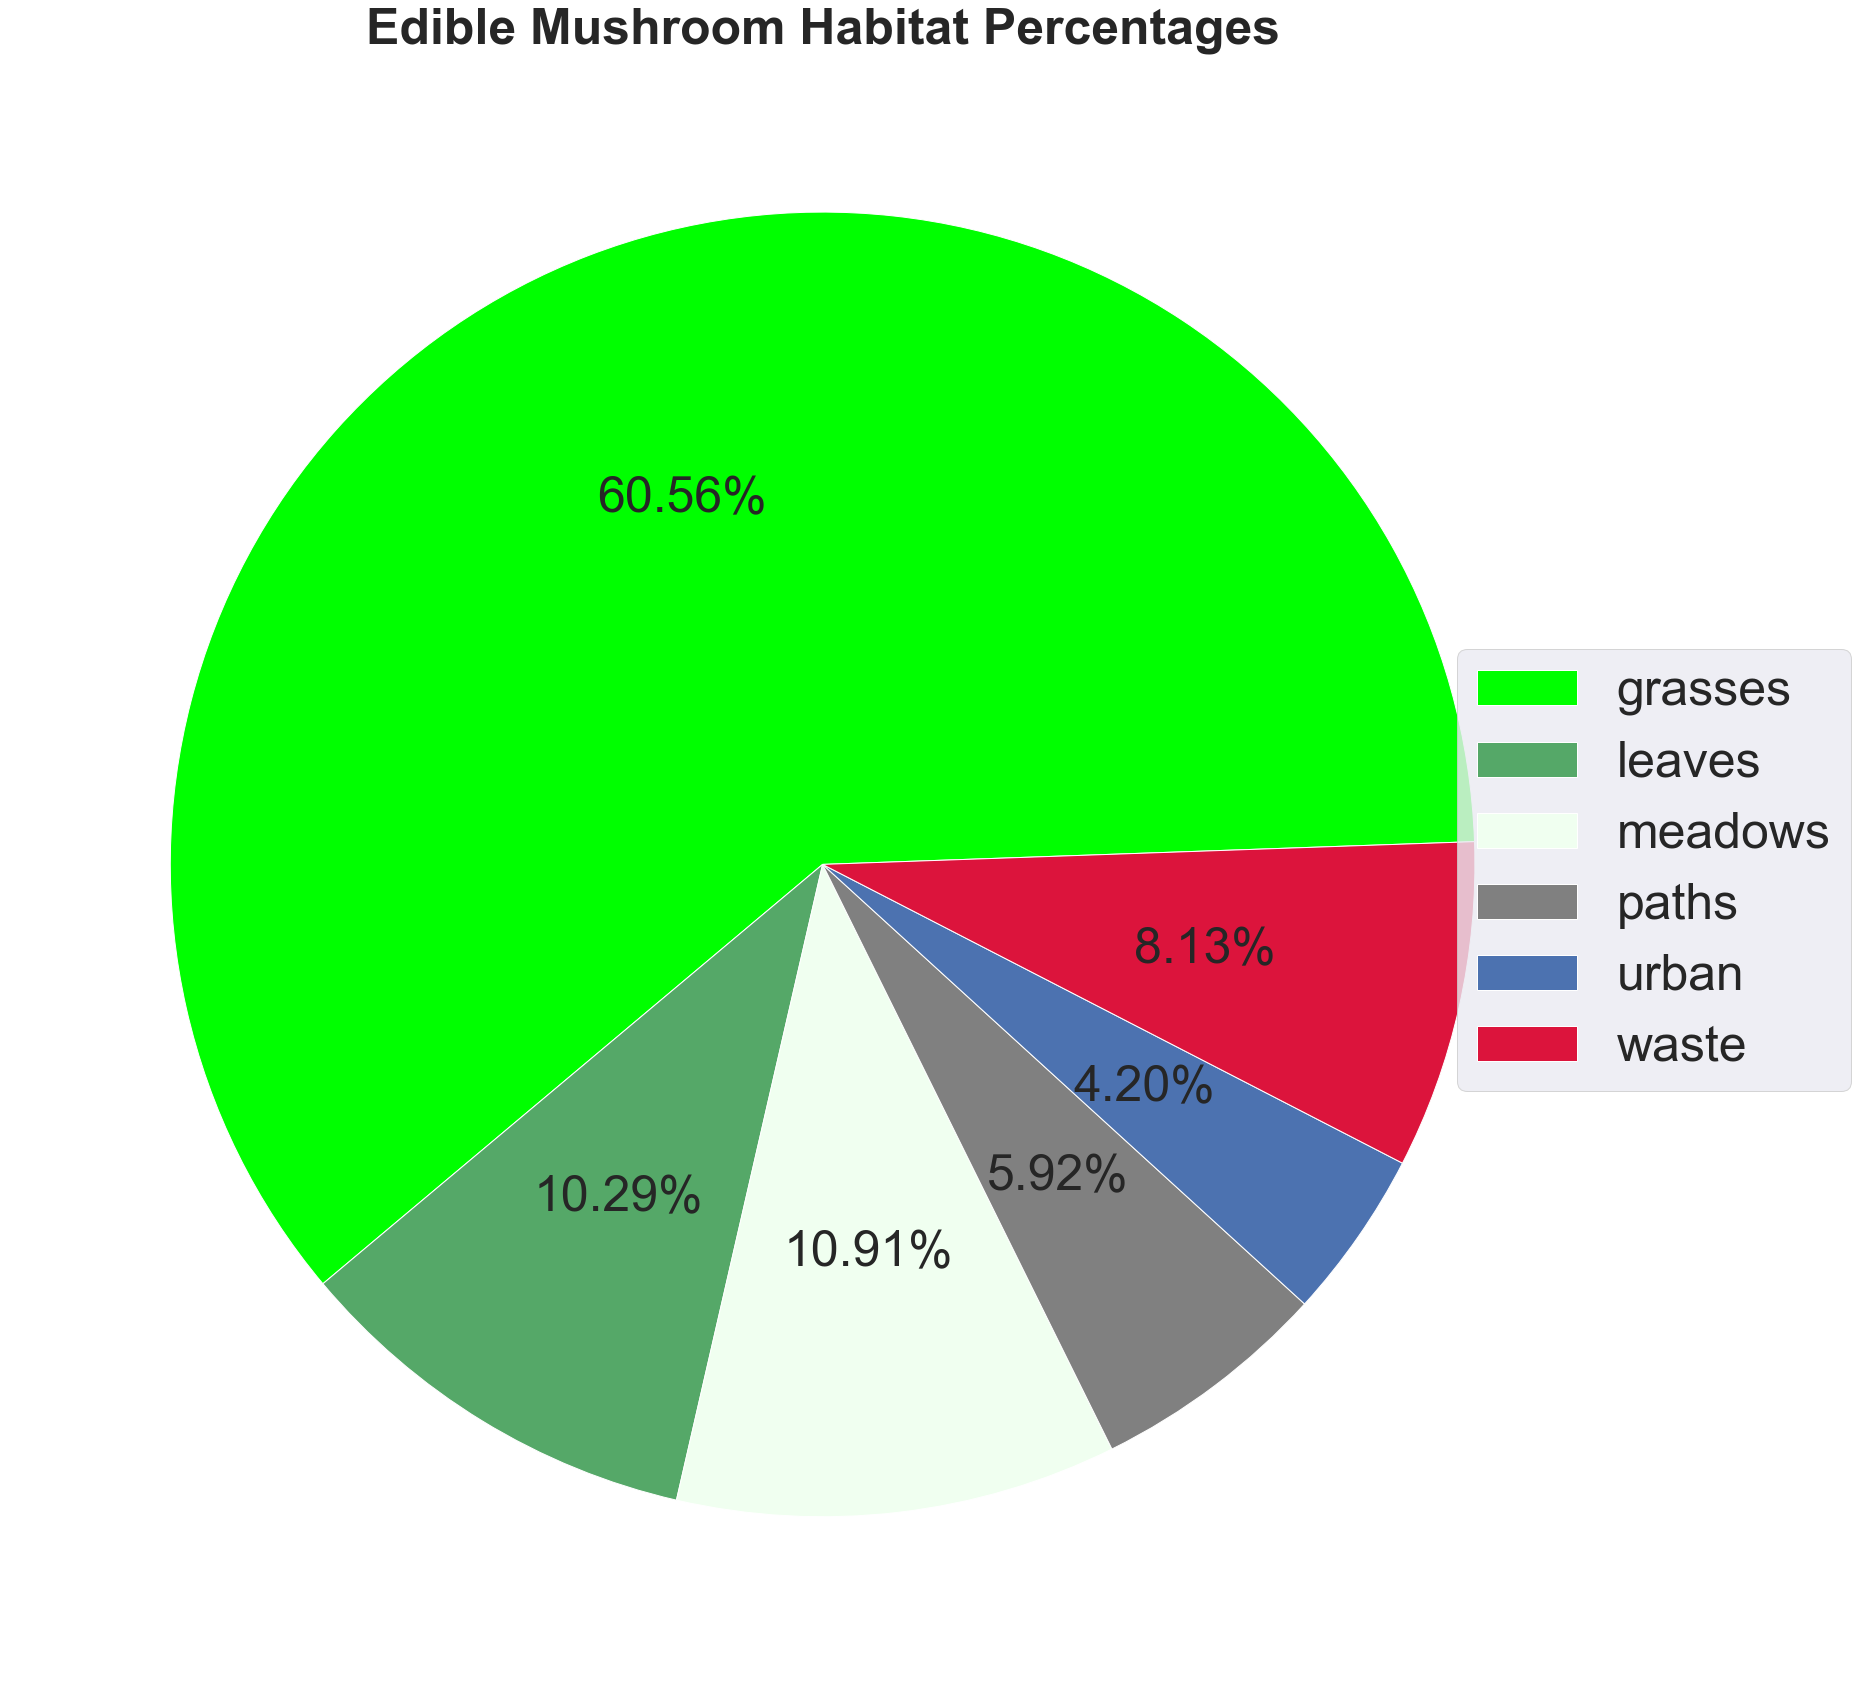

In [201]:
count = edible_habitat_counts['count']
labels = edible_habitat_counts['habitat']
colors = ['lime','g','honeydew','grey','b','crimson','saddlebrown']
plt.pie(count,
       colors = colors,
       startangle=2,
       autopct='%1.2f%%',
       textprops={'fontsize':50})
plt.title('Edible Mushroom Habitat Percentages', weight='bold', size=50)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=50, 
           bbox_transform=plt.gcf().transFigure)



plt.show()

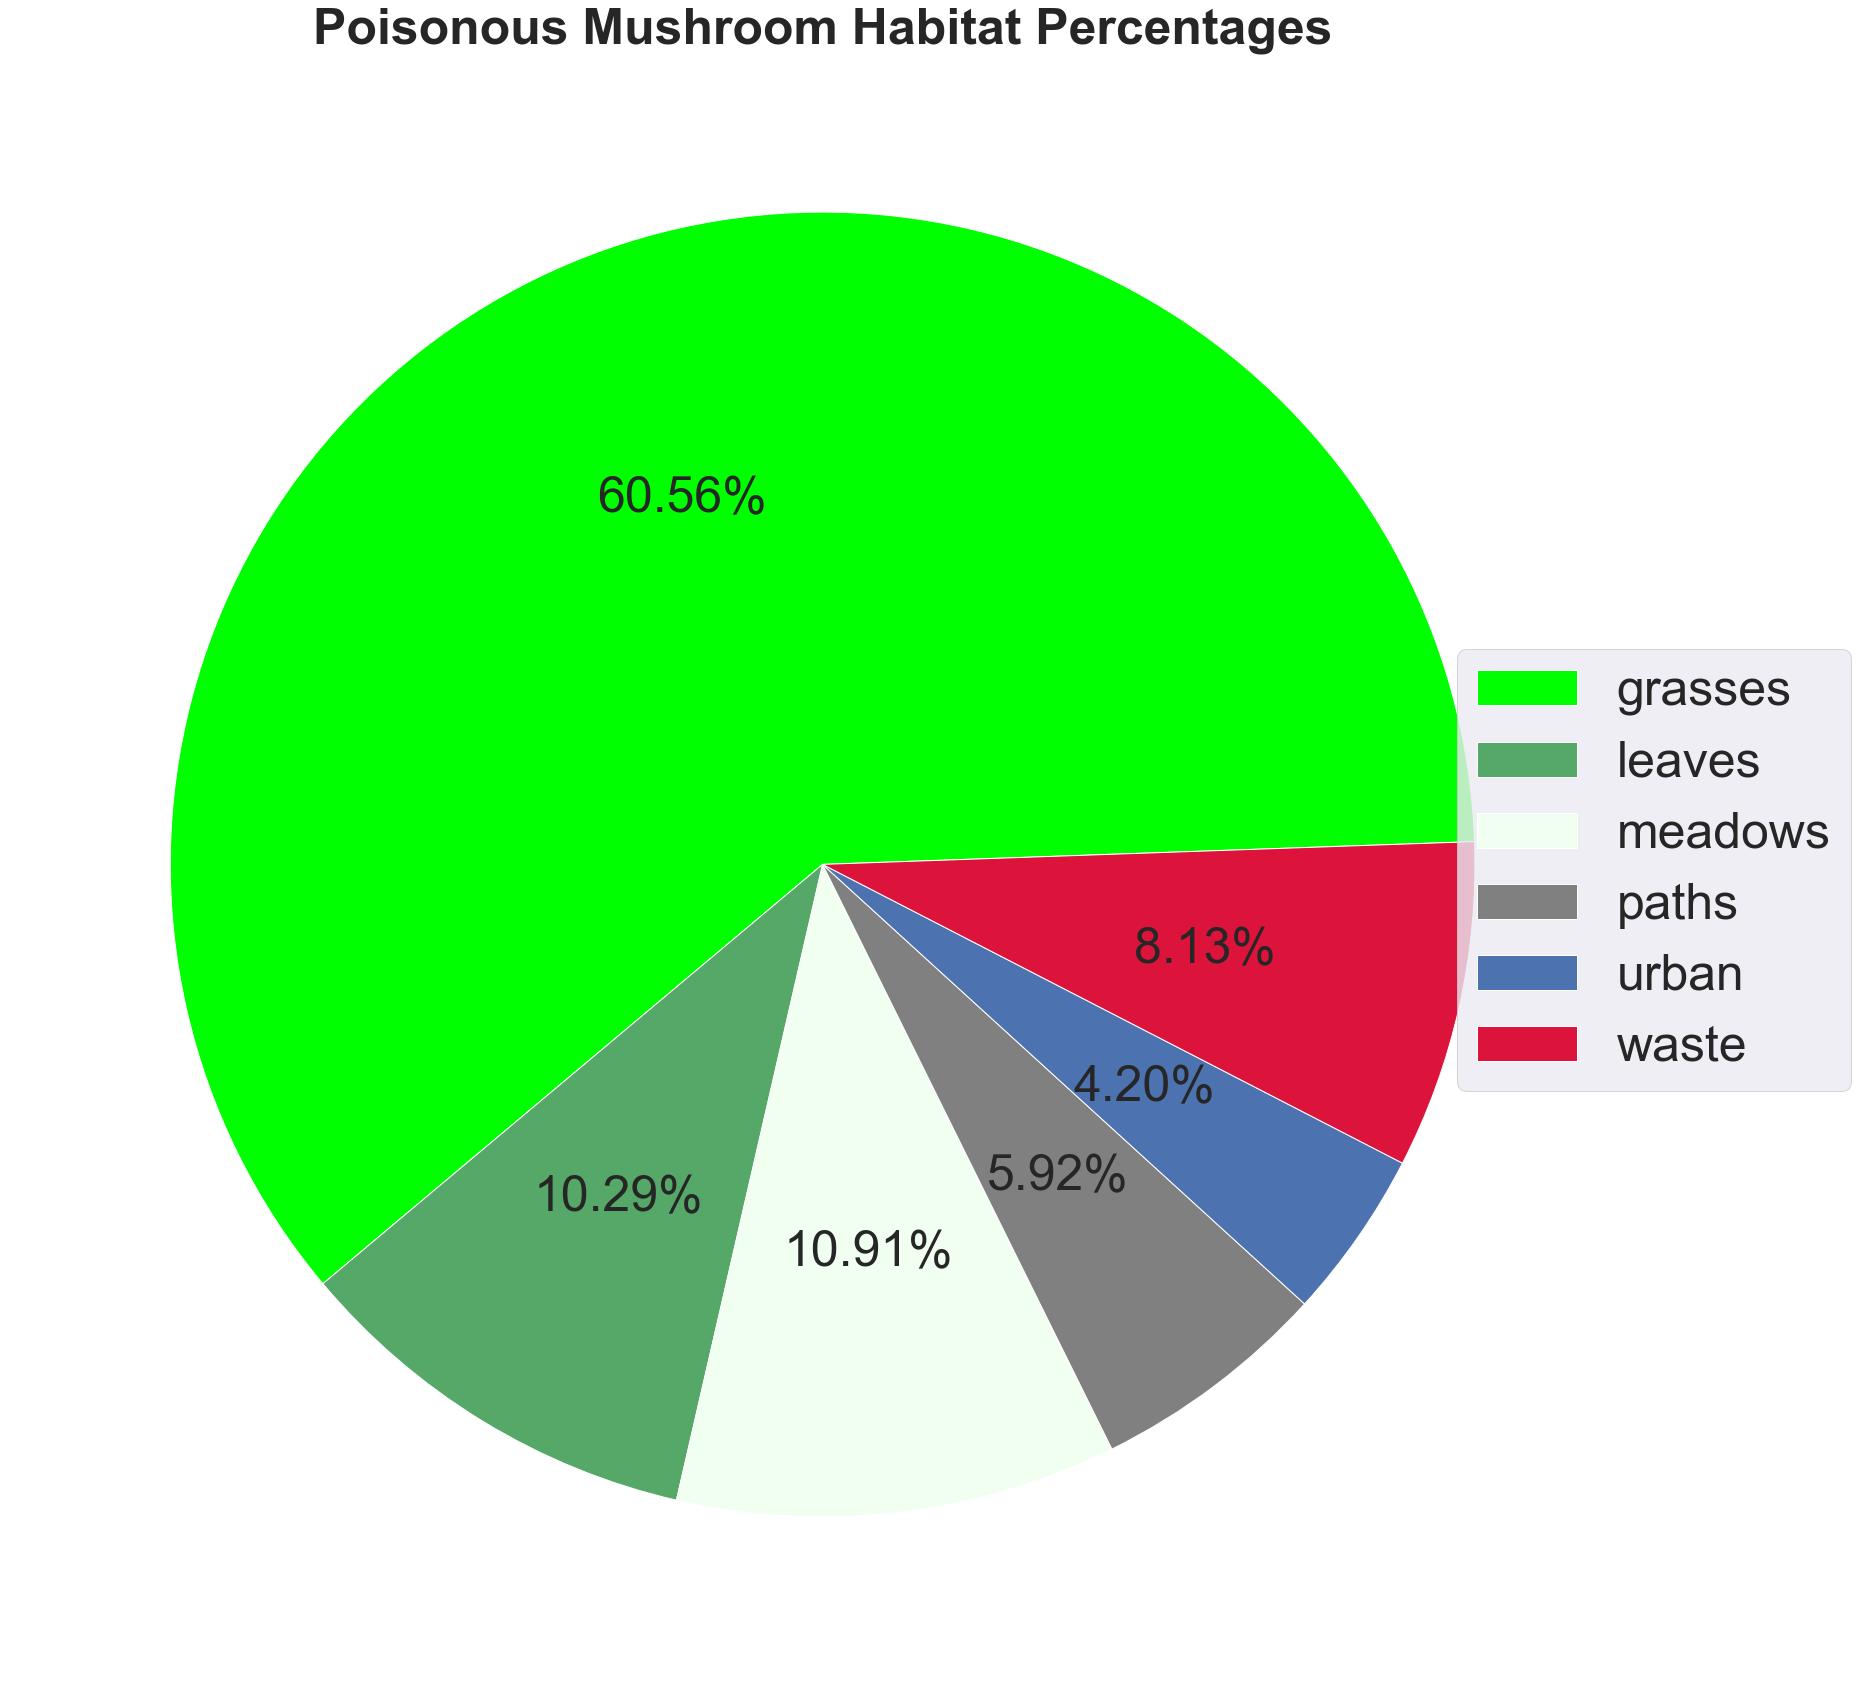

In [202]:
count1 = poisonous_habitat_counts['count']
label1 = poisonous_habitat_counts['habitat']
colors = ['lime','g','honeydew','grey','b','crimson','saddlebrown']
plt.pie(count,
       colors = colors,
       startangle=2,
       autopct='%1.2f%%',
       textprops={'fontsize':50})
plt.title('Poisonous Mushroom Habitat Percentages', weight='bold', size=50)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=50, 
           bbox_transform=plt.gcf().transFigure)



plt.show()